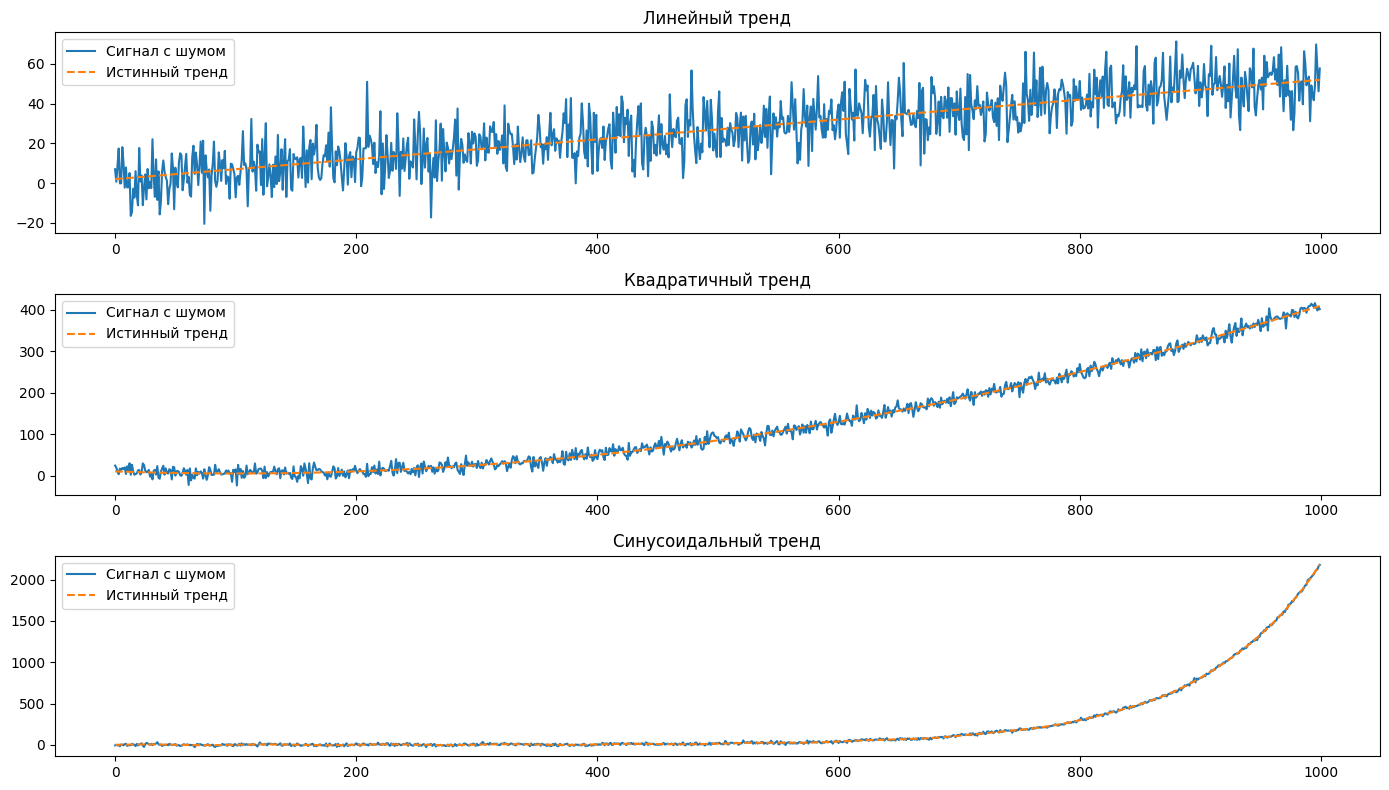

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


np.random.seed(42)
n = 1000
t = np.arange(n)

trend1 = 0.05 * t + 2
noise1 = np.random.normal(0, 10.0, size=n)
series1 = trend1 + noise1

trend2 = 0.0005 * t**2 - 0.1 * t + 10
noise2 = np.random.normal(0, 10.0, size=n)
series2 = trend2 + noise2

A = 0.1
k = 0.01
trend3 = 5 * np.sin(2 * np.pi * t / 100) + A * np.exp(k * t)
noise3 = np.random.normal(0, 10.0, size=n)
series3 = trend3 + noise3

pd.DataFrame({'signal': series1}).to_csv('linear_series.csv', index=False)
pd.DataFrame({'trend': trend1}).to_csv('linear_trend_only.csv', index=False)

pd.DataFrame({'signal': series2}).to_csv('quadratic_series.csv', index=False)
pd.DataFrame({'trend': trend2}).to_csv('quadratic_trend_only.csv', index=False)

pd.DataFrame({'signal': series3}).to_csv('exponential_series.csv', index=False)
pd.DataFrame({'trend': trend3}).to_csv('exponential_trend_only.csv', index=False)

plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(t, series1, label='Сигнал с шумом')
plt.plot(t, trend1, '--', label='Истинный тренд')
plt.title('Линейный тренд')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, series2, label='Сигнал с шумом')
plt.plot(t, trend2, '--', label='Истинный тренд')
plt.title('Квадратичный тренд')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, series3, label='Сигнал с шумом')
plt.plot(t, trend3, '--', label='Истинный тренд')
plt.title('Синусоидальный тренд')
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
import pandas as pd

# Загрузка данных
df = pd.read_csv("../App/Данные/OULU 01.01.2022 - 31.12.2024.csv")

# Преобразуем временную метку
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df = df.dropna(subset=['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Группируем по дням
daily = df['CorrectedCountRate[cts/min]'].resample('D').apply(list)

# Выравниваем все дни по максимальной длине
max_len = daily.apply(len).max()
daily_matrix = daily.apply(lambda x: x + [None]*(max_len - len(x)))

# Преобразуем в DataFrame
daily_df = pd.DataFrame(daily_matrix.tolist())

# Сохраняем результат
daily_df.to_csv("oulu_2022_2024_daily_matrix.csv", index=False)
